In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [286]:
#import warnings
#warnings.filterwarnings('ignore')

In [287]:
train = pd.read_csv('train.csv', on_bad_lines='skip')
test = pd.read_csv('test.csv', on_bad_lines='skip')

In [288]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [289]:
train.shape

(20758, 18)

In [290]:
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [291]:
test.shape

(13840, 17)

In [292]:
train = train.replace([np.inf, -np.inf], np.nan)
test = test.replace([np.inf, -np.inf], np.nan)

In [293]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [294]:
test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [295]:
train.duplicated().sum()

0

In [296]:
test.duplicated().sum()

0

In [297]:
id = test['id']
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [298]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [299]:
train.describe().T

count       mean        std    min        25%        50%  \
Age     20758.0  23.841804   5.688072  14.00  20.000000  22.815416   
Height  20758.0   1.700245   0.087312   1.45   1.631856   1.700000   
Weight  20758.0  87.887768  26.379443  39.00  66.000000  84.064875   
FCVC    20758.0   2.445908   0.533218   1.00   2.000000   2.393837   
NCP     20758.0   2.761332   0.705375   1.00   3.000000   3.000000   
CH2O    20758.0   2.029418   0.608467   1.00   1.792022   2.000000   
FAF     20758.0   0.981747   0.838302   0.00   0.008013   1.000000   
TUE     20758.0   0.616756   0.602113   0.00   0.000000   0.573887   

               75%         max  
Age      26.000000   61.000000  
Height    1.762887    1.975663  
Weight  111.600553  165.057269  
FCVC      3.000000    3.000000  
NCP       3.000000    4.000000  
CH2O      2.549617    3.000000  
FAF       1.587406    3.000000  
TUE       1.000000    2.000000

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1

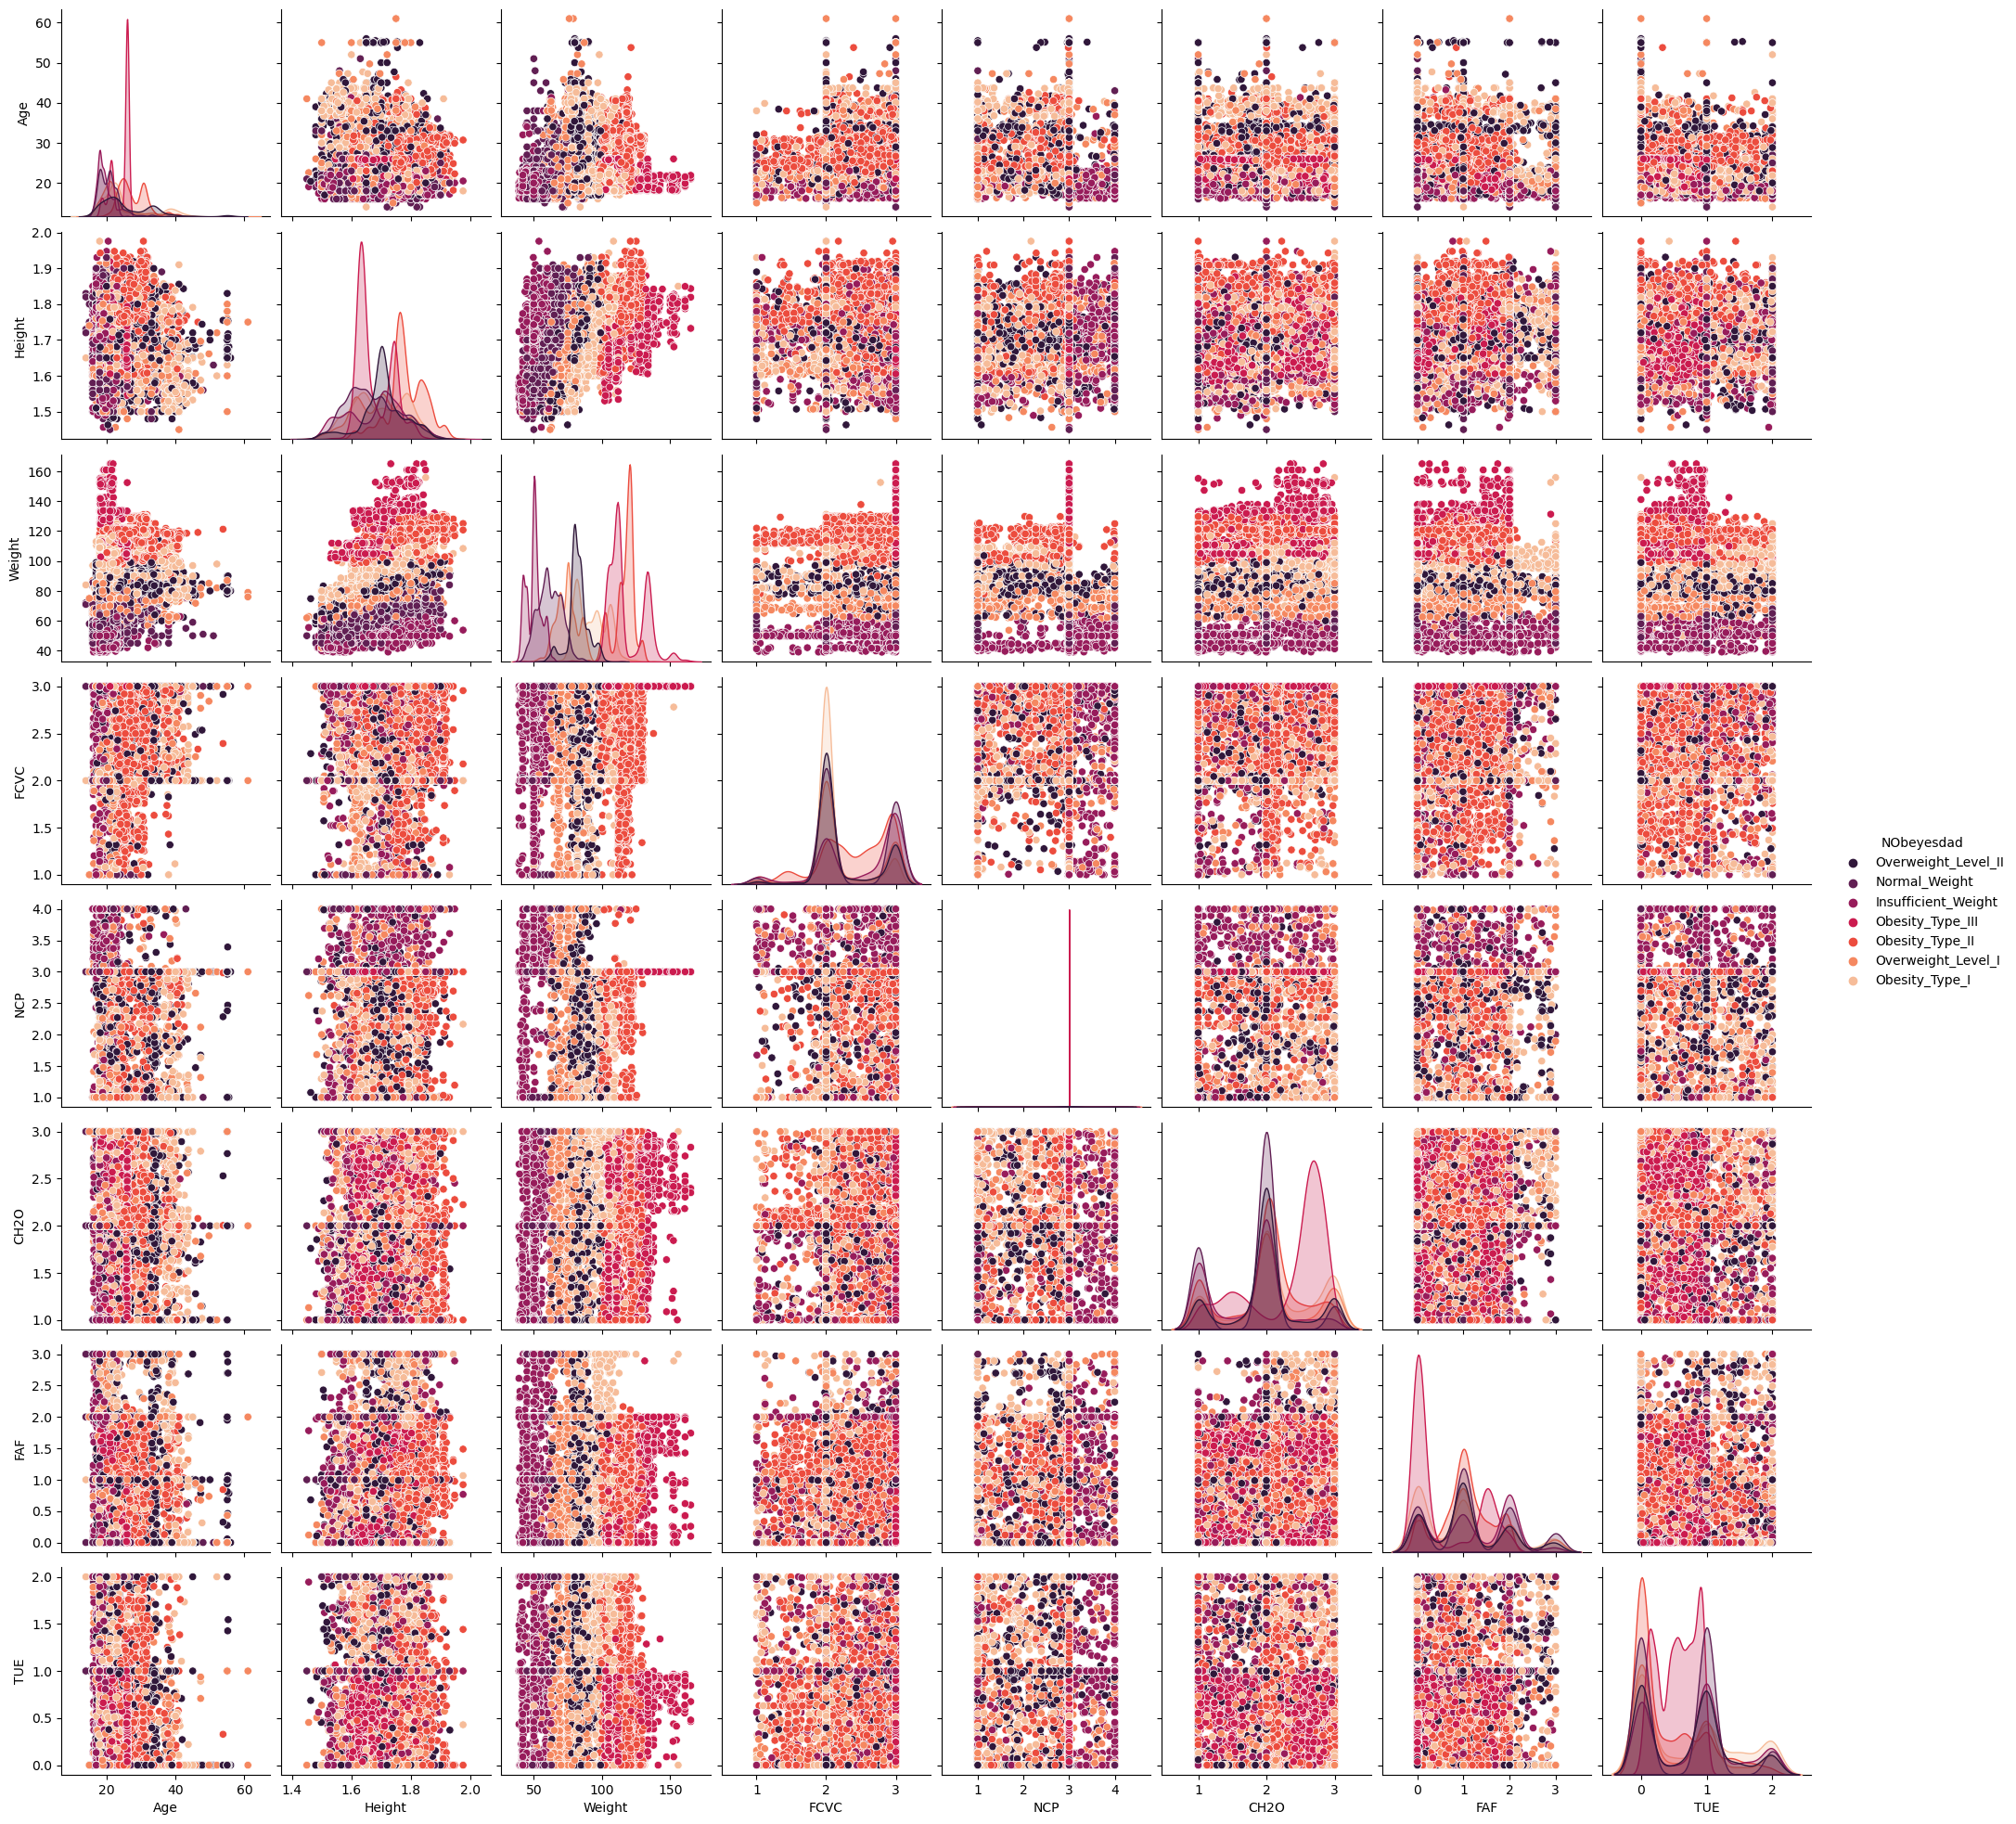

In [300]:
sns.pairplot(train, hue='NObeyesdad', palette='rocket')
plt.show()

In [301]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [302]:
cat_cols = []
for col in train.columns:
    if train[col].dtype == 'object':
        cat_cols.append(col)

cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [303]:
for col in cat_cols:
    print(f"{col} data has {train[col].nunique()} types of values.")
    print(train[col].value_counts(), "\n")

Gender data has 2 types of values.
Gender
Female    10422
Male      10336
Name: count, dtype: int64 

family_history_with_overweight data has 2 types of values.
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64 

FAVC data has 2 types of values.
FAVC
yes    18982
no      1776
Name: count, dtype: int64 

CAEC data has 4 types of values.
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64 

SMOKE data has 2 types of values.
SMOKE
no     20513
yes      245
Name: count, dtype: int64 

SCC data has 2 types of values.
SCC
no     20071
yes      687
Name: count, dtype: int64 

CALC data has 3 types of values.
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 

MTRANS data has 5 types of values.
MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: cou

In [304]:
for col in test.columns:
    if test[col].dtype == 'object':
        print(f"{col} data has {test[col].nunique()} types of values.")
        print(test[col].value_counts(), "\n")

Gender data has 2 types of values.
Gender
Female    6965
Male      6875
Name: count, dtype: int64 

family_history_with_overweight data has 2 types of values.
family_history_with_overweight
yes    11384
no      2456
Name: count, dtype: int64 

FAVC data has 2 types of values.
FAVC
yes    12583
no      1257
Name: count, dtype: int64 

CAEC data has 4 types of values.
CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64 

SMOKE data has 2 types of values.
SMOKE
no     13660
yes      180
Name: count, dtype: int64 

SCC data has 2 types of values.
SCC
no     13376
yes      464
Name: count, dtype: int64 

CALC data has 4 types of values.
CALC
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64 

MTRANS data has 5 types of values.
MTRANS
Public_Transportation    11111
Automobile                2405
Walking                    280
Bike                        25
Motorbike                 

In [305]:
test.loc[test['CALC']=='Always', 'CALC'] = 'Frequently'

In [306]:
test['CALC'].value_counts()

CALC
Sometimes     9979
no            3513
Frequently     348
Name: count, dtype: int64

In [307]:
num_cols = []
for col in train.columns:
    if train[col].dtype == 'float':
        num_cols.append(col)
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [308]:
correlation_matrix = train[num_cols].corr()
correlation_matrix

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325 -0.192259   
Height -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706  0.295278   
Weight  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914 -0.084845   
FCVC    0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299 -0.089822   
NCP    -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949  0.100871   
CH2O   -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000  0.082932   
FAF    -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932  1.000000   
TUE    -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654  0.021213   

             TUE  
Age    -0.296154  
Height  0.076433  
Weight -0.086471  
FCVC   -0.147843  
NCP     0.067459  
CH2O   -0.010654  
FAF     0.021213  
TUE     1.000000

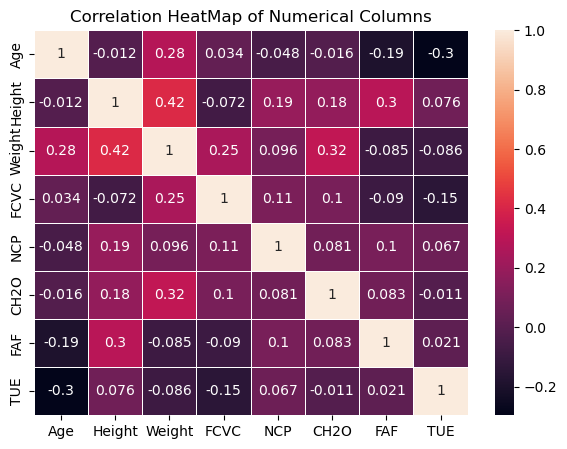

In [309]:
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation HeatMap of Numerical Columns')
plt.show()

In [310]:
train['NObeyesdad'].value_counts().index

Index(['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I'],
      dtype='object', name='NObeyesdad')

In [311]:
train['NObeyesdad'].value_counts().values

array([4046, 3248, 3082, 2910, 2523, 2522, 2427], dtype=int64)

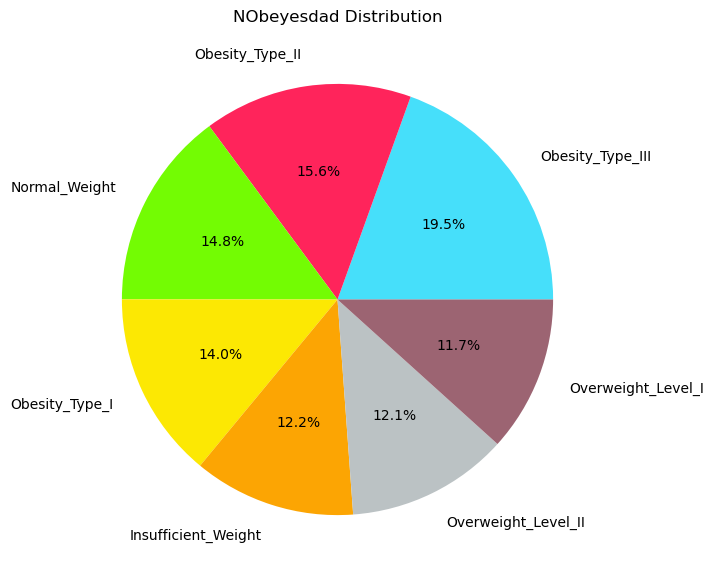

In [312]:
plt.figure(figsize=(15, 7))
values = train['NObeyesdad'].value_counts().values
indices = train['NObeyesdad'].value_counts().index
plt.pie(values, 
        labels=indices, 
        autopct="%0.1f%%", 
        colors=['#46dffa', '#ff245b', '#73fc03', '#fce803', '#fca503', '#bbc2c4', '#9c6472'], 
        labeldistance=1.15)
plt.title(f"{col} Distribution")
plt.show()

In [313]:
train['NObeyesdad'].value_counts().index

Index(['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I'],
      dtype='object', name='NObeyesdad')

In [314]:
target = pd.DataFrame()
target['NObeyesdad'] = train['NObeyesdad'].value_counts().index
target

NObeyesdad
0     Obesity_Type_III
1      Obesity_Type_II
2        Normal_Weight
3       Obesity_Type_I
4  Insufficient_Weight
5  Overweight_Level_II
6   Overweight_Level_I

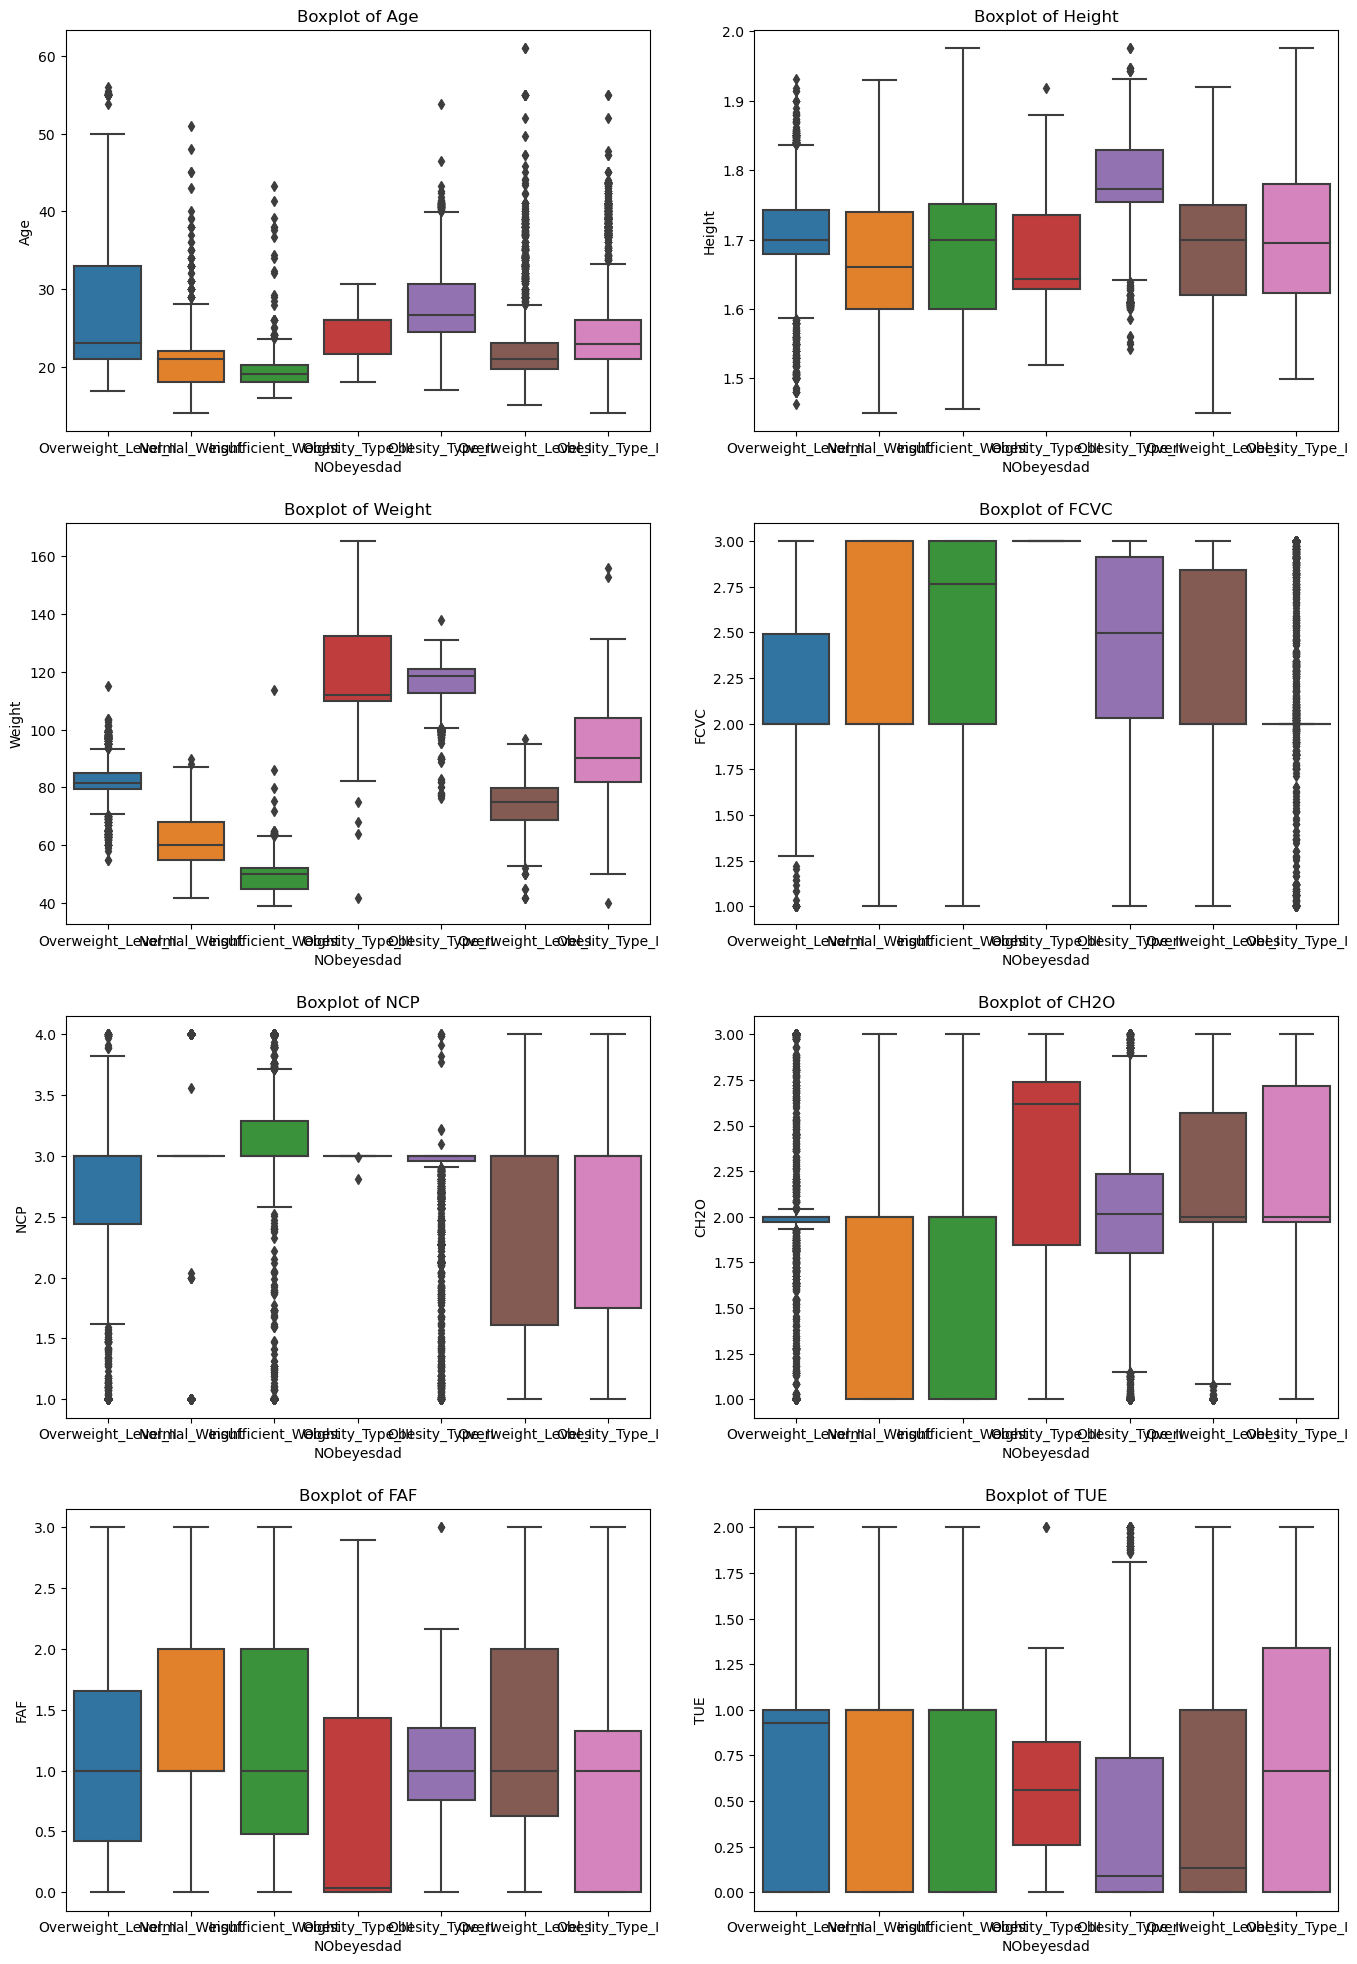

In [315]:
plt.figure(figsize=(14, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='NObeyesdad', y=train[col], data=train)
    plt.title(f'Boxplot of {col}')
plt.tight_layout(pad=2)
plt.show()

In [316]:
train[train['NObeyesdad']=='Normal_Weight'].index

Index([    1,    11,    14,    17,    21,    28,    40,    58,    63,   107,
       ...
       20665, 20675, 20683, 20692, 20693, 20700, 20703, 20722, 20740, 20746],
      dtype='int64', length=3082)

In [317]:
"""
def detect_outliers(train, features):
    outlier_indices = []
    for feature in features:
        Q1 = train[feature].quantile(0.25)
        Q3 = train[feature].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train[(train[feature] < Q1 - outlier_step) | (train[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    return outlier_indices
"""

'\ndef detect_outliers(train, features):\n    outlier_indices = []\n    for feature in features:\n        Q1 = train[feature].quantile(0.25)\n        Q3 = train[feature].quantile(0.75)\n        IQR = Q3 - Q1\n        outlier_step = 1.5 * IQR\n        outlier_list_col = train[(train[feature] < Q1 - outlier_step) | (train[feature] > Q3 + outlier_step)].index\n        outlier_indices.extend(outlier_list_col)\n    return outlier_indices\n'

In [318]:
#outliers = detect_outliers(train, num_cols)
#outliers

In [319]:
#train = train.drop(outliers).reset_index(drop=True)

In [320]:
train.shape

(20758, 17)

In [321]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['NObeyesdad'] = le.fit_transform(train['NObeyesdad'])

In [322]:
train['NObeyesdad'].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

In [323]:
train['NObeyesdad'].value_counts().index

Index([4, 3, 1, 2, 0, 6, 5], dtype='int32', name='NObeyesdad')

In [324]:
target['Labels'] = train['NObeyesdad'].value_counts().index
target

NObeyesdad  Labels
0     Obesity_Type_III       4
1      Obesity_Type_II       3
2        Normal_Weight       1
3       Obesity_Type_I       2
4  Insufficient_Weight       0
5  Overweight_Level_II       6
6   Overweight_Level_I       5

In [325]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
X_train

Gender        Age    Height      Weight family_history_with_overweight  \
9958     Male  17.000000  1.770000   97.000000                            yes   
7841     Male  22.667596  1.753389   54.877111                            yes   
9293     Male  21.838323  1.819867  122.024954                            yes   
15209  Female  41.000000  1.580000   80.000000                            yes   
16515    Male  23.000000  1.800000   95.000000                            yes   
...       ...        ...       ...         ...                            ...   
11284  Female  18.000000  1.722461   80.442775                            yes   
11964    Male  22.000000  1.750000   95.000000                            yes   
5390     Male  21.000000  1.620000   68.000000                             no   
860    Female  26.000000  1.650125  111.939671                            yes   
15795    Male  37.997912  1.774330  107.998815                            yes   

      FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF  \
9958   yes  3.000000  3.000000     Always    no  2.000000  no  3.000000   
7841   yes  2.000000  4.000000  Sometimes    no  2.000000  no  2.000000   
9293   yes  3.000000  2.880817  Sometimes    no  1.645338  no  0.739881   
15209  yes  2.000000  3.000000  Sometimes    no  1.000000  no  0.000000   
16515   no  3.000000  3.000000  Sometimes    no  3.000000  no  2.000000   
...    ...       ...       ...        ...   ...       ...  ..       ...   
11284  yes  2.628791  2.562895  Sometimes    no  1.844645  no  0.288032   
11964   no  3.000000  3.000000  Sometimes    no  2.000000  no  3.000000   
5390   yes  2.000000  3.000000     Always    no  3.000000  no  2.000000   
860    yes  3.000000  3.000000  Sometimes    no  2.770732  no  0.000000   
15795  yes  2.964419  2.902766  Sometimes    no  2.745242  no  2.545707   

            TUE        CALC                 MTRANS  
9958   1.000000          no             Automobile  
7841   1.000000          no  Public_Transportation  
9293   0.000000   Sometimes  Public_Transportation  
15209  0.000000   Sometimes             Automobile  
16515  1.000000  Frequently  Public_Transportation  
...         ...         ...                    ...  
11284  0.722276          no  Public_Transportation  
11964  0.000000   Sometimes  Public_Transportation  
5390   0.000000   Sometimes  Public_Transportation  
860    0.237307   Sometimes  Public_Transportation  
15795  0.000000   Sometimes             Automobile  

[16606 rows x 16 columns]

In [328]:
X_test

Gender        Age    Height      Weight family_history_with_overweight  \
10317  Female  26.000000  1.649178  111.933010                            yes   
4074     Male  18.000000  1.750000   80.000000                             no   
9060   Female  23.360307  1.713380   84.722222                            yes   
11286    Male  30.002029  1.670667  112.000381                            yes   
8254     Male  17.000000  1.610000   50.000000                             no   
...       ...        ...       ...         ...                            ...   
20286  Female  16.000000  1.560000   51.000000                             no   
8233     Male  18.000000  1.780000  108.000000                            yes   
11518  Female  22.693989  1.627908   82.000000                            yes   
7947     Male  33.185661  1.826970   87.000000                            yes   
11274    Male  21.024970  1.721854   80.000000                            yes   

      FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF  \
10317  yes  3.000000  3.000000  Sometimes    no  1.292479  no  0.065264   
4074   yes  2.000000  3.000000  Sometimes    no  2.000000  no  1.000000   
9060   yes  2.880161  3.000000  Sometimes    no  2.847264  no  2.000000   
11286  yes  1.572036  3.000000  Sometimes    no  2.003563  no  0.000000   
8254   yes  2.000000  3.000000  Sometimes    no  2.000000  no  0.000000   
...    ...       ...       ...        ...   ...       ...  ..       ...   
20286  yes  2.000000  3.000000     Always    no  2.000000  no  1.000000   
8233   yes  2.000000  1.000000  Sometimes    no  3.000000  no  1.000000   
11518  yes  1.918251  1.000000  Sometimes    no  1.998108  no  0.000000   
7947   yes  2.000000  1.000000  Sometimes    no  2.175632  no  2.000000   
11274  yes  2.000000  1.630728  Sometimes    no  2.000000  no  1.000000   

            TUE       CALC                 MTRANS  
10317  0.711331  Sometimes  Public_Transportation  
4074   1.000000  Sometimes  Public_Transportation  
9060   0.002600         no  Public_Transportation  
11286  0.114457  Sometimes  Public_Transportation  
8254   2.000000         no  Public_Transportation  
...         ...        ...                    ...  
20286  1.000000  Sometimes  Public_Transportation  
8233   0.000000  Sometimes  Public_Transportation  
11518  1.382906  Sometimes  Public_Transportation  
7947   0.000000  Sometimes             Automobile  
11274  0.000000  Sometimes  Public_Transportation  

[4152 rows x 16 columns]

In [329]:
y_train

9958     2
7841     0
9293     3
15209    2
16515    6
        ..
11284    5
11964    6
5390     5
860      4
15795    2
Name: NObeyesdad, Length: 16606, dtype: int32

In [330]:
y_test

10317    4
4074     5
9060     2
11286    3
8254     0
        ..
20286    1
8233     2
11518    2
7947     5
11274    6
Name: NObeyesdad, Length: 4152, dtype: int32

In [331]:
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [332]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

In [333]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first', dtype='int'), ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']),
    ('tnf2', OrdinalEncoder(dtype='int'), ['CAEC', 'CALC']),
    ('tnf3', StandardScaler(), num_cols)
], remainder='passthrough')

In [334]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [335]:
X_train_transformed.shape

(16606, 19)

In [336]:
X_test_transformed.shape

(4152, 19)

In [337]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, 
    QuadraticDiscriminantAnalysis
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [338]:
knc = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=None, max_depth=None)
abc = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.05, max_depth=5, subsample=0.6)
xgb = XGBClassifier(n_estimators=100, random_state=42)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='rbf', random_state=42)
lsvc = LinearSVC(random_state=42)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
gpc = GaussianProcessClassifier(random_state=42)
lgbm = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=len(np.unique(y)), n_estimators=100, random_state=42, learning_rate=0.05, max_depth=5, min_child_samples=20, num_leaves=31, subsample=0.6)
cbc = CatBoostClassifier(iterations=100, random_state=42)

In [339]:
clfs = {
    'KNN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb,
    'GNB': gnb,
    #'MNB': mnb,
    'BNB': bnb,
    'LinearSVC': lsvc,
    'LGBM': lgbm,
    'CatBoost': cbc
}

In [340]:
from sklearn.metrics import accuracy_score

In [341]:
def train_classifier(clf, X_train_transformed, y_train, X_test_transformed, y_test):
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [342]:
clfs.items()

dict_items([('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier(max_depth=5, random_state=42)), ('LR', LogisticRegression(penalty='l1', random_state=42, solver='liblinear')), ('RF', RandomForestClassifier()), ('AdaBoost', AdaBoostClassifier(algorithm='SAMME', random_state=42)), ('BgC', BaggingClassifier(n_estimators=50, random_state=42)), ('ETC', ExtraTreesClassifier(random_state=42)), ('GBDT', GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=42,
                           subsample=0.6)), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, ma

In [343]:
clfs.keys()

dict_keys(['KNN', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'XGB', 'GNB', 'BNB', 'LinearSVC', 'LGBM', 'CatBoost'])

In [344]:
accuracy_scores = []
for name, clf in clfs.items():
    current_accuracy = train_classifier(clf, X_train_transformed, y_train, X_test_transformed, y_test)
    print('Name: ', name)
    print('Accuracy Score: ', current_accuracy)
    print('\n')
    accuracy_scores.append(current_accuracy)

Name:  KNN
Accuracy Score:  0.7589113680154143


Name:  DT
Accuracy Score:  0.8369460500963392


Name:  LR
Accuracy Score:  0.7615606936416185


Name:  RF
Accuracy Score:  0.8940269749518305


Name:  AdaBoost
Accuracy Score:  0.6934007707129094


Name:  BgC
Accuracy Score:  0.8896917148362236


Name:  ETC
Accuracy Score:  0.8733140655105973


Name:  GBDT
Accuracy Score:  0.9024566473988439


Name:  XGB
Accuracy Score:  0.9002890173410405


Name:  GNB
Accuracy Score:  0.6209055876685935


Name:  BNB
Accuracy Score:  0.6461946050096339


Name:  LinearSVC
Accuracy Score:  0.7514450867052023


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2022
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -2.117

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [345]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores}).sort_values('Accuracy', ascending=False)

In [346]:
performance_df

Algorithm  Accuracy
12       LGBM  0.905347
7        GBDT  0.902457
8         XGB  0.900289
13   CatBoost  0.897158
3          RF  0.894027
5         BgC  0.889692
6         ETC  0.873314
1          DT  0.836946
2          LR  0.761561
0         KNN  0.758911
11  LinearSVC  0.751445
4    AdaBoost  0.693401
10        BNB  0.646195
9         GNB  0.620906

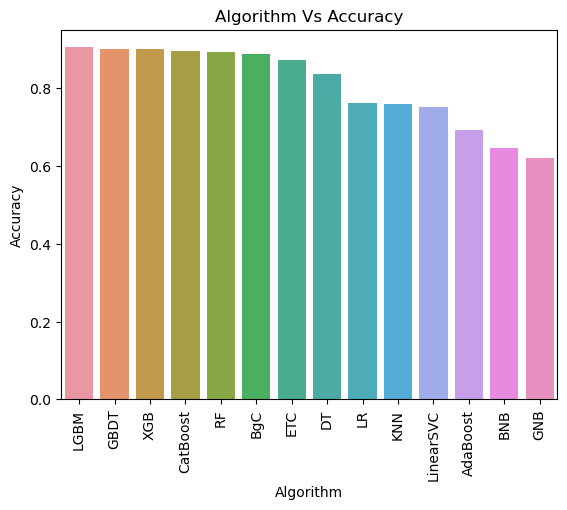

In [347]:
sns.barplot(x=performance_df['Algorithm'], y=performance_df['Accuracy'])
plt.xticks(rotation='vertical')
plt.title('Algorithm Vs Accuracy')
plt.show()

In [348]:
clf = lgbm

In [349]:
clf.fit(X_train_transformed, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2022
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(learning_rate=0.05, max_depth=5, num_class=7,
               objective='multiclass', random_state=42, subsample=0.6)

In [350]:
y_pred = clf.predict(X_test_transformed)

In [351]:
accuracy_score(y_test, y_pred)

0.9053468208092486

In [352]:
Xf = test.iloc[:, :]

In [353]:
Xf_transformed = transformer.transform(Xf)

In [354]:
yf = clf.predict(Xf_transformed)

In [355]:
yf

array([3, 5, 4, ..., 0, 1, 3])

In [356]:
yf.shape

(13840,)

In [357]:
yf[0]

3

In [358]:
target

NObeyesdad  Labels
0     Obesity_Type_III       4
1      Obesity_Type_II       3
2        Normal_Weight       1
3       Obesity_Type_I       2
4  Insufficient_Weight       0
5  Overweight_Level_II       6
6   Overweight_Level_I       5

In [359]:
target.set_index('Labels', inplace=True)

In [360]:
target

NObeyesdad
Labels                     
4          Obesity_Type_III
3           Obesity_Type_II
1             Normal_Weight
2            Obesity_Type_I
0       Insufficient_Weight
6       Overweight_Level_II
5        Overweight_Level_I

In [361]:
new_dict = target.to_dict()

In [362]:
new_dict

{'NObeyesdad': {4: 'Obesity_Type_III',
  3: 'Obesity_Type_II',
  1: 'Normal_Weight',
  2: 'Obesity_Type_I',
  0: 'Insufficient_Weight',
  6: 'Overweight_Level_II',
  5: 'Overweight_Level_I'}}

In [363]:
new_dict['NObeyesdad']

{4: 'Obesity_Type_III',
 3: 'Obesity_Type_II',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 0: 'Insufficient_Weight',
 6: 'Overweight_Level_II',
 5: 'Overweight_Level_I'}

In [364]:
[new_dict['NObeyesdad'][yf[i].item()] for i in range(yf.shape[0])]

['Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Insufficient_Weight',
 'Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Obesity_Type_III',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Normal_Weight',
 'Obesity_Type_III',
 'Obesity_Type_III',
 'Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Insufficient_Weight',
 'Obesity_Type_I',
 'Overweight_Level_II',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Overweight_Level_I',
 'Overweight_Level_I',
 'Obesity_Type_I',
 'Normal_Weight',
 'Insufficient_Weight',
 'Overweight_Level_II',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Obesity_Type_I',
 'Obesi

In [365]:
submission = pd.DataFrame()

In [366]:
submission['id'] = id
submission['NObeyesdad'] = [new_dict['NObeyesdad'][yf[i].item()] for i in range(yf.shape[0])]

In [367]:
submission

id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]

In [368]:
submission.to_csv('submission.csv', index=False)